In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [17]:
data=pd.read_csv('Car_Pricing_final_data.csv')

In [18]:
df=pd.DataFrame(data)
df

,Unnamed: 0,Unnamed: 0.1,Brand,Model,Automatic,Variant,Km,Location,Man_year,Fuel,Owner,Price
0,0,0,Maruti,Alto 800 LXI MANUAL,MANUAL,LXI MANUAL,"15,999",Bengaluru,2013,Petro,1st,"2,74,599"
1,1,1,Maruti,Ritz VXI MANUAL,MANUAL,VXI MANUAL,"28,022",Bengaluru,2011,Petro,1st,"3,77,999"
2,2,2,Hyundai,AURA SX (O) MT,MT,SX (O) MT,"3,382",Bengaluru,2022,Petro,1st,"8,07,099"
3,3,3,Hyundai,i20 MAGNA O 1.2 MANUAL,MANUAL,MAGNA O 1.2 MANUAL,"55,910",Bengaluru,2014,Petro,1st,"4,42,299"
4,4,4,Maruti,Swift ZXI MANUAL,MANUAL,ZXI MANUAL,"47,003",Bengaluru,2012,Petro,1st,"4,93,799"
...,...,...,...,...,...,...,...,...,...,...,...,...
5229,5229,478,Hyundai,Xcent SX 1.2 MANUAL,MANUAL,SX 1.2 MANUAL,"22,364",Mumbai,2016,Petro,1st,"5,66,599"
5230,5230,479,Ford,Ecosport 1.5 TREND TI VCT MANUAL,MANUAL,1.5 TREND TI VCT MANUAL,"45,877",Mumbai,2016,Petro,2nd,"5,18,999"
5231,5231,480,Ford,Ecosport 1.5 TREND TI VCT MANUAL,MANUAL,1.5 TREND TI VCT MANUAL,"45,877",Mumbai,2016,Petro,2nd,"5,18,999"
5232,5232,481,Maruti,Wagon R 1.0 LXI CNG MANUAL,MANUAL,LXI CNG MANUAL,"44,517",Mumbai,2017,Petro,NaN,"4,61,999"


In [19]:
df.shape

(5234, 12)

In [20]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Brand', 'Model', 'Automatic', 'Variant',
       'Km', 'Location', 'Man_year', 'Fuel', 'Owner', 'Price'],
      dtype='object')

We can see that there are 5234 rows and 12 columns in the dataset, out of which 2 columns are unnamed, we can drop off these columns as they are just index of the data

In [21]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [82]:
df['Fuel']=df['Fuel'].replace(to_replace=['Petro'], value='Petrol')
df['Fuel']=df['Fuel'].replace(to_replace=['Diese'], value='Diesel')

In [23]:
df.Price = df.Price.str.replace(',', '')
df.Km = df.Km.str.replace(',', '')

In [28]:
df["Price"] = pd.to_numeric(df["Price"])
df["Km"] = pd.to_numeric(df["Km"])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      5234 non-null   object
 1   Model      5234 non-null   object
 2   Automatic  5234 non-null   object
 3   Variant    5234 non-null   object
 4   Km         5234 non-null   int64 
 5   Location   5234 non-null   object
 6   Man_year   5234 non-null   int64 
 7   Fuel       5234 non-null   object
 8   Owner      5016 non-null   object
 9   Price      5234 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 409.0+ KB


We can observe that there is null data only in Owner and rest of the variables don't have any missing values

As we can observe that we have a column to tell if the car is automtic or manual we can remove this from Model and Variant variables

In [35]:
df.Model = df.Model.str.replace('MANUAL', '')
df.Model = df.Model.str.replace('AUTOMATIC', '')

In [37]:
df.Variant = df.Variant.str.replace('MANUAL', '')
df.Variant = df.Variant.str.replace('AUTOMATIC', '')

In [38]:
df

,Brand,Model,Automatic,Variant,Km,Location,Man_year,Fuel,Owner,Price
0,Maruti,Alto 800 LXI,MANUAL,LXI,15999,Bengaluru,2013,Petro,1st,274599
1,Maruti,Ritz VXI,MANUAL,VXI,28022,Bengaluru,2011,Petro,1st,377999
2,Hyundai,AURA SX (O) MT,MT,SX (O) MT,3382,Bengaluru,2022,Petro,1st,807099
3,Hyundai,i20 MAGNA O 1.2,MANUAL,MAGNA O 1.2,55910,Bengaluru,2014,Petro,1st,442299
4,Maruti,Swift ZXI,MANUAL,ZXI,47003,Bengaluru,2012,Petro,1st,493799
...,...,...,...,...,...,...,...,...,...,...
5229,Hyundai,Xcent SX 1.2,MANUAL,SX 1.2,22364,Mumbai,2016,Petro,1st,566599
5230,Ford,Ecosport 1.5 TREND TI VCT,MANUAL,1.5 TREND TI VCT,45877,Mumbai,2016,Petro,2nd,518999
5231,Ford,Ecosport 1.5 TREND TI VCT,MANUAL,1.5 TREND TI VCT,45877,Mumbai,2016,Petro,2nd,518999
5232,Maruti,Wagon R 1.0 LXI CNG,MANUAL,LXI CNG,44517,Mumbai,2017,Petro,NaN,461999


In [34]:
df['Automatic'].unique()

array(['MANUAL', 'MT', 'AUTOMATIC', 'CVT', '6STR', 'TURBO', '1.0', 'TONE',
       'AMT', 'IMT', '1.2', 'SHARP', 'PLUS', '7STR', 'AT', 'SHVS', 'CRDI',
       'OPT', 'S', 'STR', 'PETROL', 'DSG', 'HYBRID', 'L', 'DCT', 'RTN',
       'RTQ', 'RED', 'Petrol', '1.3', 'EDITION', 'CNG'], dtype=object)

In the Variable Automatic we can observe that there are some elements which is about variants, Since the data have no clarity about whether the car is automatic or Manual in these cases we can condider there to be Manual

In [50]:
df['Automatic']=df['Automatic'].replace(to_replace=['MT', 'CVT', '6STR', 'TURBO', '1.0', 'TONE', 'AMT', 'IMT', '1.2', 'SHARP', 'PLUS', '7STR', 'AT', 'SHVS', 'CRDI', 'OPT', 'S', 'STR', 'PETROL', 'DSG', 'HYBRID', 'L', 'DCT', 'RTN', 'RTQ', 'RED', 'Petrol', '1.3', 'EDITION', 'CNG'], value='MANUAL')

In [51]:
df['Automatic'].value_counts()

MANUAL       4271
AUTOMATIC     963
Name: Automatic, dtype: int64

Hence we are left with 10 variables, in which Price is target variable and 9 variables are inputs for our model

# Visualization and EDA

<AxesSubplot:xlabel='Brand', ylabel='count'>

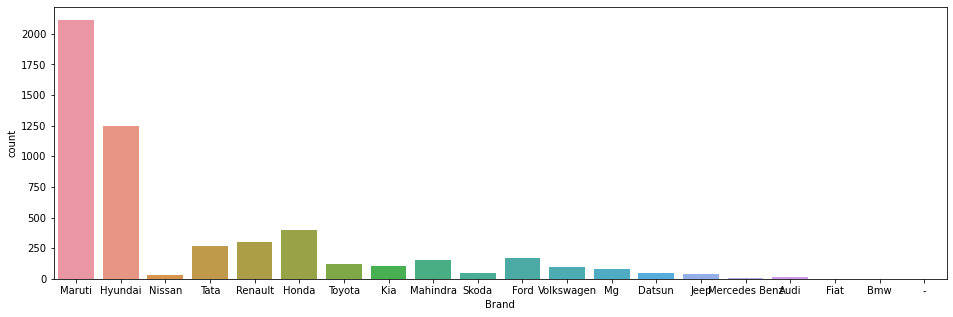

In [55]:
plt.figure(figsize=(16,5))
sns.countplot(df['Brand'])

In [57]:
df['Brand'].value_counts()

Maruti           2112
Hyundai          1249
Honda             395
Renault           302
Tata              271
Ford              171
Mahindra          156
Toyota            117
Kia               102
Volkswagen         95
Mg                 78
Skoda              45
Datsun             45
Jeep               41
Nissan             33
Audi               14
Mercedes Benz       5
Fiat                1
Bmw                 1
-                   1
Name: Brand, dtype: int64

From the plot and table above we can observe that Highest number of cars are from Maruthi and Hyundai brands.

<AxesSubplot:xlabel='Price', ylabel='Count'>

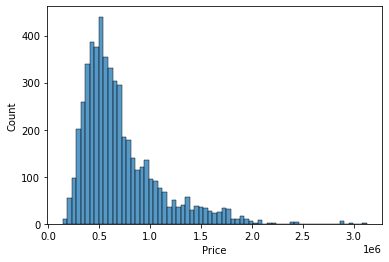

In [71]:
sns.histplot(df['Price'])

Above plot shows us the distribution of Price, it is understandable that most of the cars price ranges from 3 to 7 lakhs

<AxesSubplot:xlabel='Automatic', ylabel='count'>

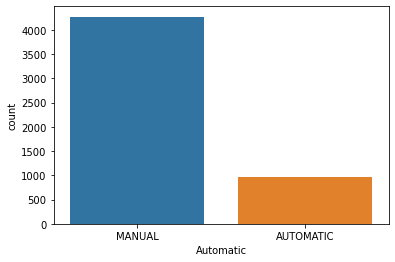

In [72]:
sns.countplot(df['Automatic'])

In [73]:
df['Automatic'].value_counts()

MANUAL       4271
AUTOMATIC     963
Name: Automatic, dtype: int64

We can see from the above data that 4271 cars are of Manual operation and only 963 cars are Automatic

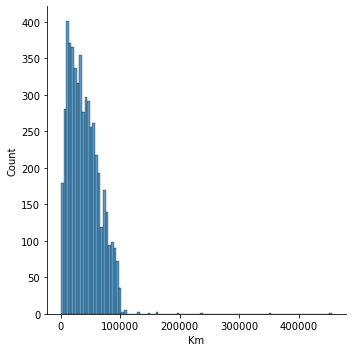

In [74]:
sns.displot(df['Km'])

From the above plot it is clear that maximum number opf cars driven Kms falls between 0 to 100000

<AxesSubplot:xlabel='Location', ylabel='count'>

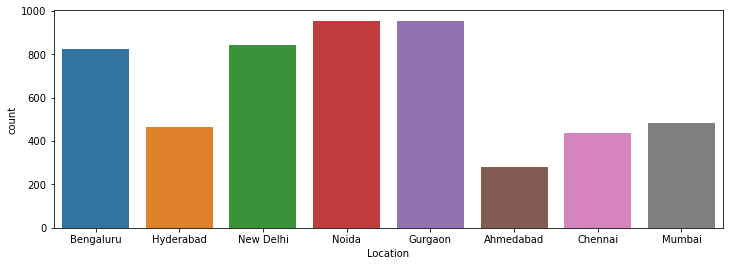

In [77]:
plt.figure(figsize=(12,4))
sns.countplot(df['Location'])

In [78]:
df['Location'].value_counts()

Gurgaon      954
Noida        952
New Delhi    842
Bengaluru    824
Mumbai       483
Hyderabad    465
Chennai      436
Ahmedabad    278
Name: Location, dtype: int64

Data consists of 954 and 952 cars details which belongs to Gurgaon and Noida, 842 cars from New Delhi, 824 cars from Bengaluru, 483 cars from Mumbai, 465 cars from Hyderabad, 436 cars from Chennai and 278 cars from Ahmedabad

<AxesSubplot:xlabel='Man_year', ylabel='Count'>

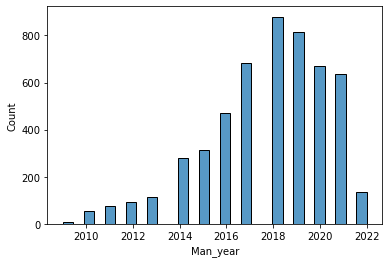

In [80]:
sns.histplot(df['Man_year'])

Most of the cars in the dataset are manufactured in the years 2017 to 2021 as we can observe in the above plot

<AxesSubplot:xlabel='Fuel', ylabel='count'>

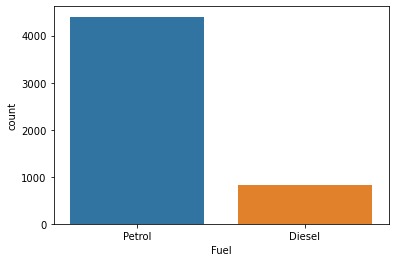

In [83]:
sns.countplot(df['Fuel'])

In [84]:
df['Fuel'].value_counts()

Petrol    4402
Diesel     832
Name: Fuel, dtype: int64

As we can observe from the above plot and data 4402 cars are Petrol cars and 832 are Diesel cars

<AxesSubplot:xlabel='Owner', ylabel='count'>

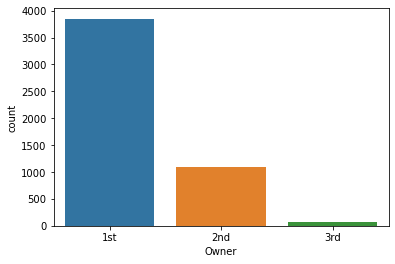

In [86]:
sns.countplot(df['Owner'])

In [87]:
df['Owner'].value_counts()

1st    3851
2nd    1090
3rd      75
Name: Owner, dtype: int64

The data has 3851 cars from 1st owner, 1090 cars from 2nd and only 75 cars from 3rd owner

<AxesSubplot:xlabel='Km', ylabel='Price'>

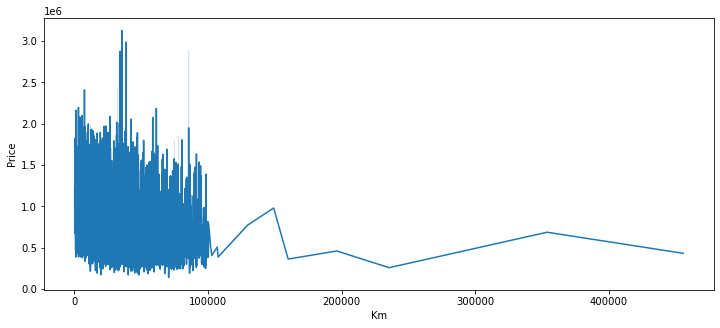

In [88]:
plt.figure(figsize = (12,5))
sns.lineplot(y='Price', x='Km', data=df)

From the above plot we can observe that the price is high for those cars whose driven Km is less and as the driven Km increases the price decreases

<AxesSubplot:xlabel='Location', ylabel='Price'>

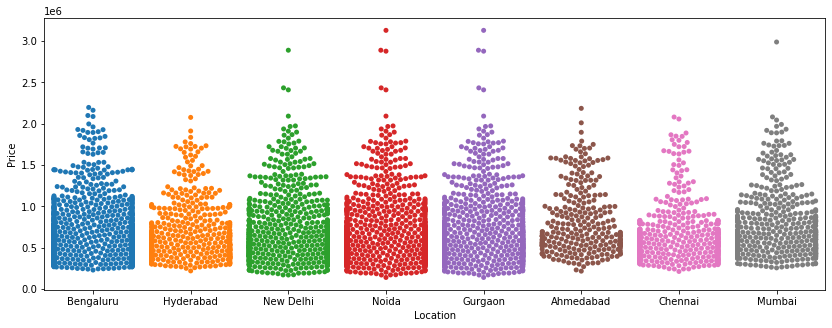

In [93]:
plt.figure(figsize = (14,5))
sns.swarmplot(y='Price', x='Location', data=df)

The price is reaching high for those cars in Moida and Gurgaon

<AxesSubplot:xlabel='Man_year', ylabel='Price'>

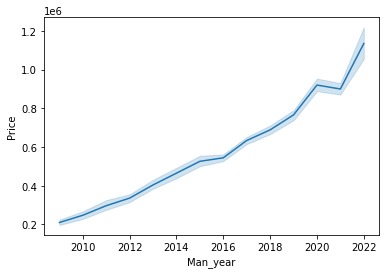

In [90]:
sns.lineplot(y='Price', x='Man_year', data=df)

From the above plot we can observe that the price is increasing for the cars which are manufactured in the recent years, the older cars' price is lesser

<AxesSubplot:xlabel='Automatic', ylabel='Price'>

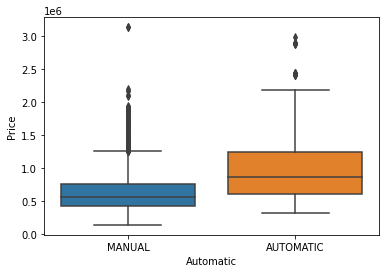

In [96]:
sns.boxplot(y='Price', x='Automatic', data=df)

We can see that the min and max price is higher for the cars which have automatic operations compared to manual cars

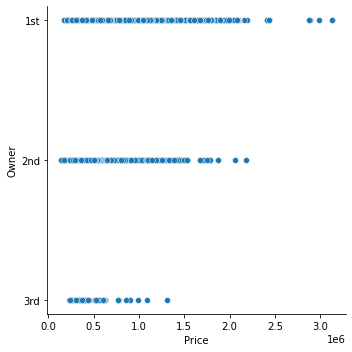

In [97]:
sns.relplot(x='Price', y='Owner', data=df)

We can observe from the above plot that the price is higher for those cars which are sold from 1st owner than that of 2nd and owners

<AxesSubplot:xlabel='Fuel', ylabel='Price'>

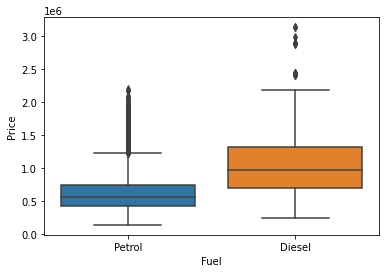

In [99]:
sns.boxplot(y='Price', x='Fuel', data=df)

The price is higher for the cars operate with Diesel than the Petrol cars

In [100]:
df.isnull().sum()

Brand          0
Model          0
Automatic      0
Variant        0
Km             0
Location       0
Man_year       0
Fuel           0
Owner        218
Price          0
dtype: int64

Only the column Owner has 218 mussing values

In [101]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Owner']=imputer.fit_transform(df['Owner'].values.reshape(-1,1))

In [102]:
df.isnull().sum()

Brand        0
Model        0
Automatic    0
Variant      0
Km           0
Location     0
Man_year     0
Fuel         0
Owner        0
Price        0
dtype: int64

Hence the missing values replaced using simple imputer

In [103]:
# Encoding the columns that has object dtype
Object_columns=df.select_dtypes(include=[object])
Object_columns.head(1)

,Brand,Model,Automatic,Variant,Location,Fuel,Owner
0,Maruti,Alto 800 LXI,MANUAL,LXI,Bengaluru,Petrol,1st


In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [105]:
for columns in Object_columns:
    df[columns] = le.fit_transform(df[columns])

In [106]:
df.dtypes

Brand        int32
Model        int32
Automatic    int32
Variant      int32
Km           int64
Location     int32
Man_year     int64
Fuel         int32
Owner        int32
Price        int64
dtype: object

In [107]:
df

,Brand,Model,Automatic,Variant,Km,Location,Man_year,Fuel,Owner,Price
0,11,21,1,365,15999,1,2013,1,0,274599
1,11,559,1,581,28022,1,2011,1,0,377999
2,7,19,1,523,3382,1,2022,1,0,807099
3,7,840,1,387,55910,1,2014,1,0,442299
4,11,646,1,725,47003,1,2012,1,0,493799
...,...,...,...,...,...,...,...,...,...,...
5229,7,811,1,527,22364,5,2016,1,0,566599
5230,5,232,1,103,45877,5,2016,1,1,518999
5231,5,232,1,103,45877,5,2016,1,1,518999
5232,11,769,1,368,44517,5,2017,1,0,461999


Hence all the columns in the dataset are in integer data types

In [108]:
df.describe()

,Brand,Model,Automatic,Variant,Km,Location,Man_year,Fuel,Owner,Price
count,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5.234000e+03
mean,10.214941,379.017004,0.816011,399.334734,39770.272640,3.926060,2017.755063,0.841039,0.236912,7.022958e+05
std,3.561938,258.391964,0.387512,208.899875,26145.824706,2.269464,2.595399,0.365674,0.457694,3.756248e+05
min,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,2009.000000,0.000000,0.000000,1.390990e+05
25%,7.000000,134.000000,1.000000,246.000000,18704.500000,2.000000,2016.000000,1.000000,0.000000,4.464490e+05
50%,11.000000,346.500000,1.000000,410.000000,35799.500000,4.000000,2018.000000,1.000000,0.000000,5.998990e+05
75%,11.000000,634.000000,1.000000,581.000000,57162.750000,6.000000,2020.000000,1.000000,0.000000,8.393490e+05
max,19.000000,843.000000,1.000000,749.000000,455601.000000,7.000000,2022.000000,1.000000,2.000000,3.131049e+06


Key Observations :
* Mean > median (50th percentile) in the columns Model, Km, Price hence the data in these columns are skewed
* We can observe that there is a huge gap between 75th percentile and max in the columns Brand, Model, Variant, Km, Owner, Price and hence the data in these columns has outliers
* In the columns Brand, Model, Variant, Km, Man_year, Price we can observe that there is a high gap between mean and std, hence the data is highly spreaded

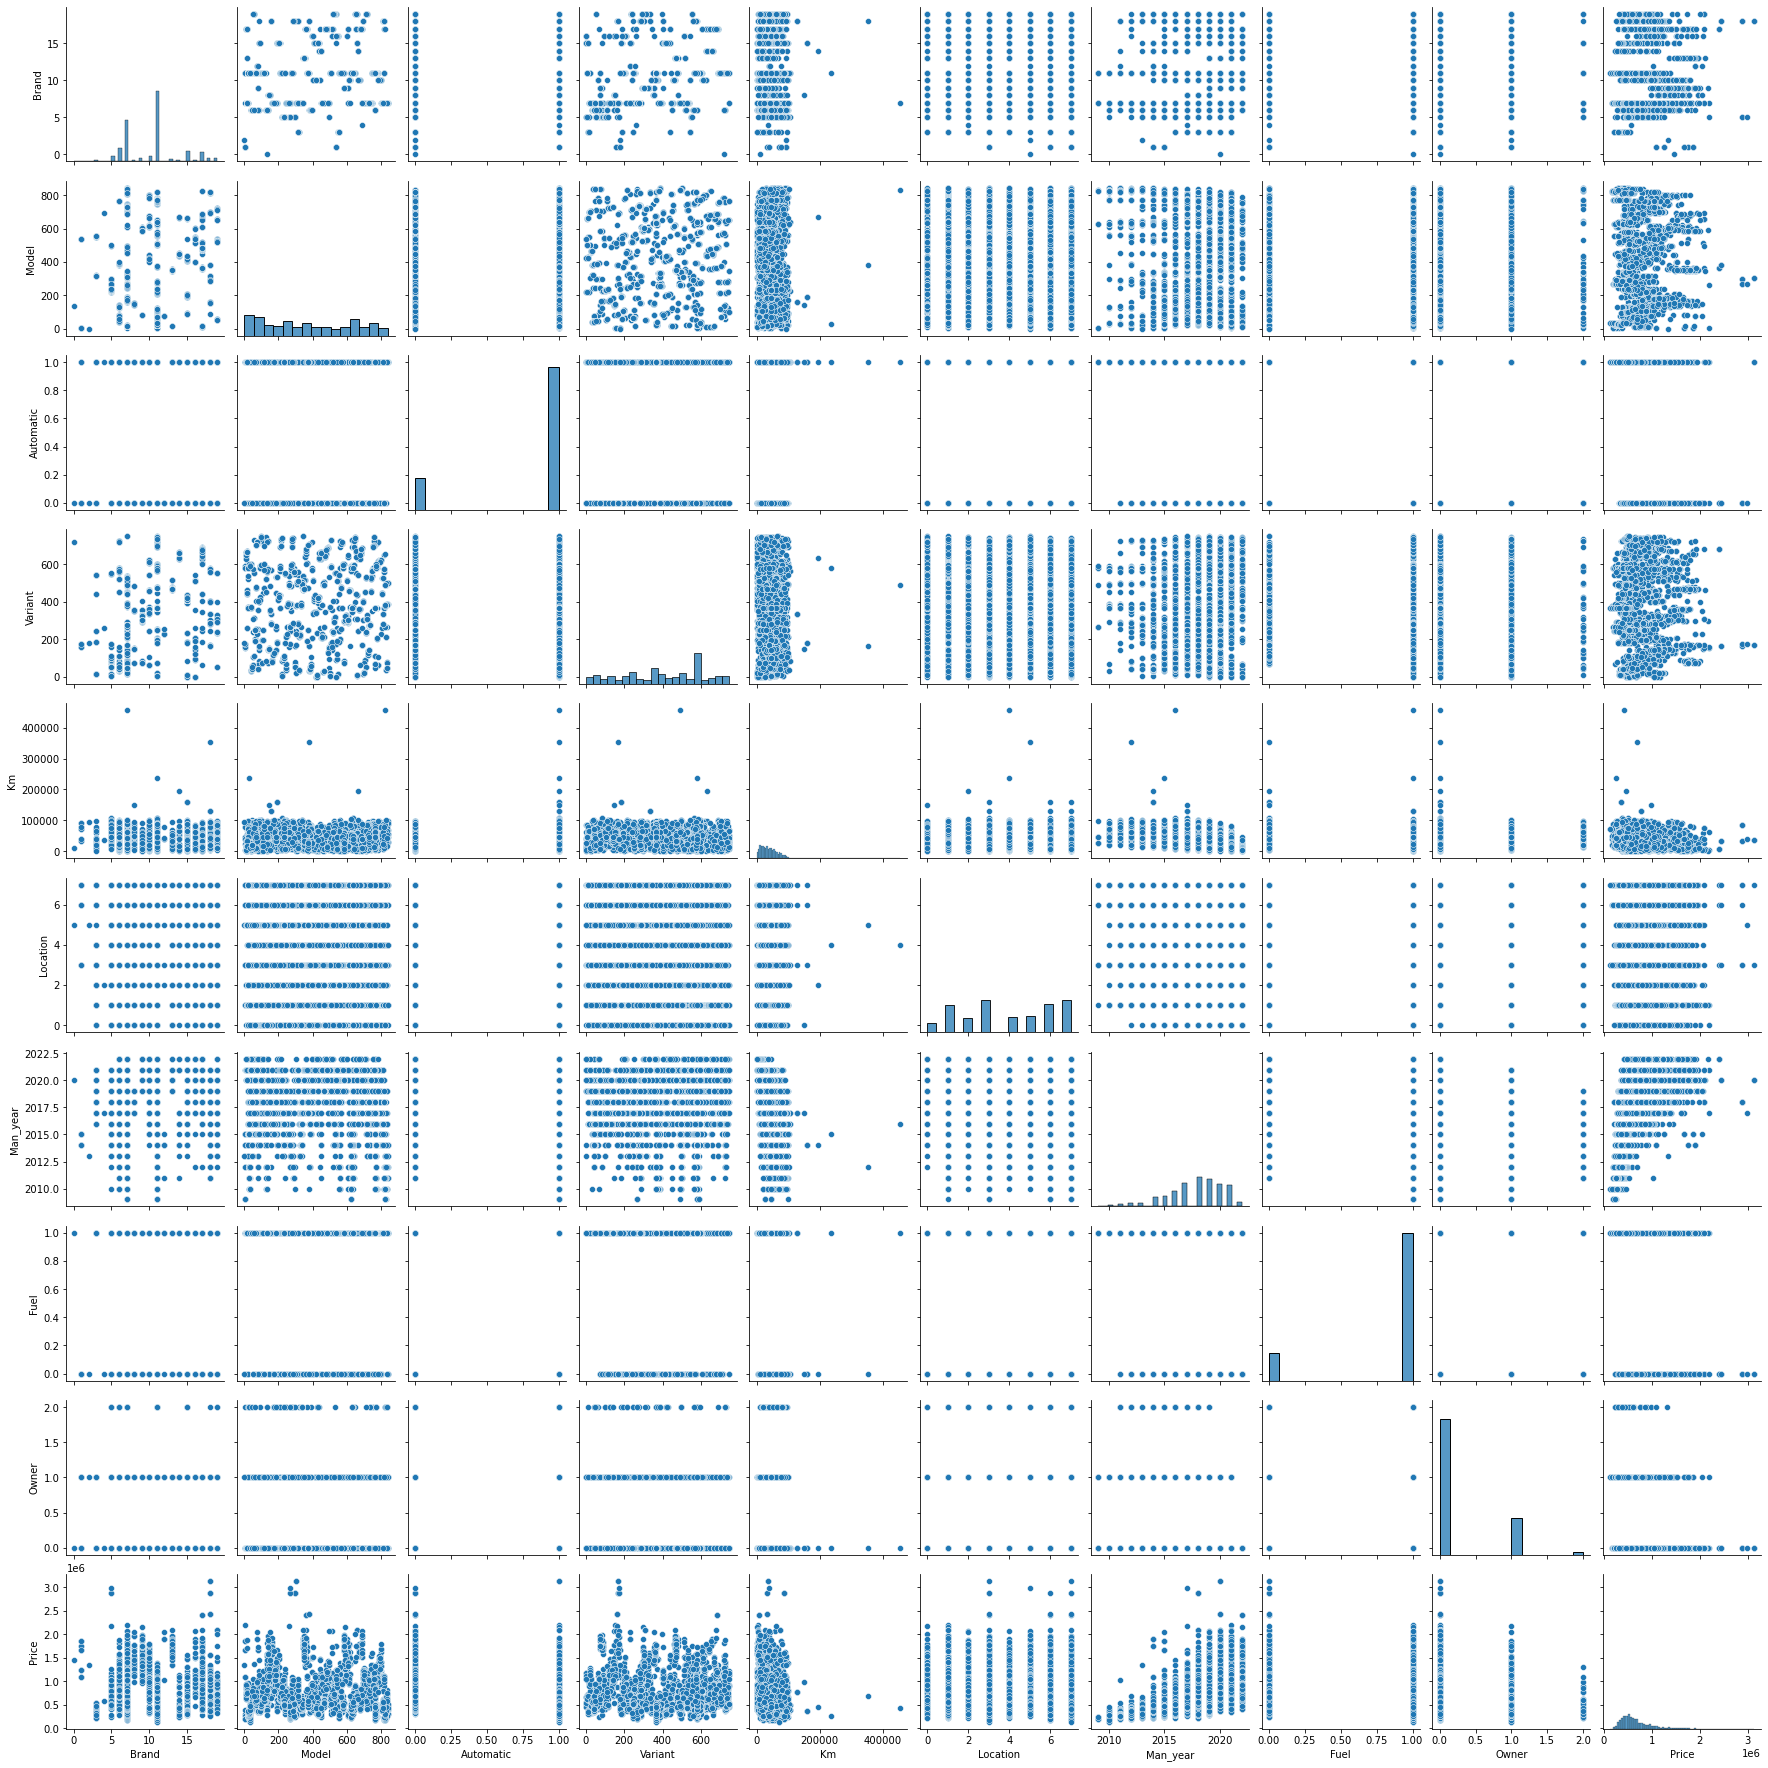

In [109]:
sns.pairplot(df)

In [110]:
df.corr()

,Brand,Model,Automatic,Variant,Km,Location,Man_year,Fuel,Owner,Price
Brand,1.000000,0.098813,-0.040704,0.323606,-0.110868,0.019436,0.186153,-0.006480,-0.081410,0.041234
Model,0.098813,1.000000,-0.009834,0.097476,0.004186,-0.039825,-0.049200,-0.125547,0.035407,0.065265
Automatic,-0.040704,-0.009834,1.000000,0.003662,0.022093,0.023640,-0.105428,0.034956,-0.027855,-0.342732
Variant,0.323606,0.097476,0.003662,1.000000,-0.044661,0.000830,0.000382,0.010831,-0.014644,-0.079968
Km,-0.110868,0.004186,0.022093,-0.044661,1.000000,-0.064215,-0.518416,-0.242872,0.111529,-0.190081
Location,0.019436,-0.039825,0.023640,0.000830,-0.064215,1.000000,0.041761,0.031888,-0.068495,-0.052323
Man_year,0.186153,-0.049200,-0.105428,0.000382,-0.518416,0.041761,1.000000,-0.007407,-0.227351,0.474593
Fuel,-0.006480,-0.125547,0.034956,0.010831,-0.242872,0.031888,-0.007407,1.000000,0.004694,-0.380300
Owner,-0.081410,0.035407,-0.027855,-0.014644,0.111529,-0.068495,-0.227351,0.004694,1.000000,-0.121353
Price,0.041234,0.065265,-0.342732,-0.079968,-0.190081,-0.052323,0.474593,-0.380300,-0.121353,1.000000


<AxesSubplot:>

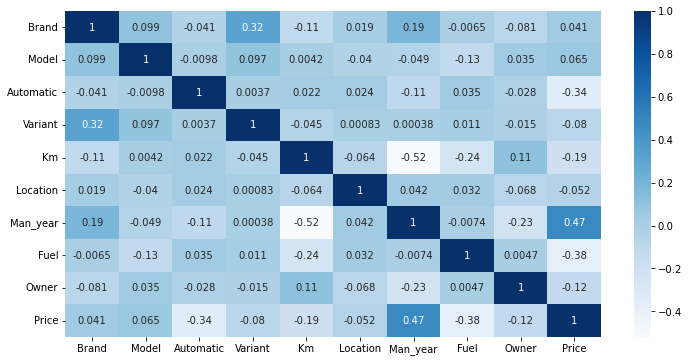

In [112]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

Key Observations :
* Price has a better correlation with Man_year, it have has a good correlation with Brand and Model
* Price has least correlation with Fuel
* Man_year has negative correlation with Km
* Brand has a better correlation with Variant compared to others

Brand           AxesSubplot(0.125,0.772143;0.227941x0.107857)
Model        AxesSubplot(0.398529,0.772143;0.227941x0.107857)
Automatic    AxesSubplot(0.672059,0.772143;0.227941x0.107857)
Variant         AxesSubplot(0.125,0.642714;0.227941x0.107857)
Km           AxesSubplot(0.398529,0.642714;0.227941x0.107857)
Location     AxesSubplot(0.672059,0.642714;0.227941x0.107857)
Man_year        AxesSubplot(0.125,0.513286;0.227941x0.107857)
Fuel         AxesSubplot(0.398529,0.513286;0.227941x0.107857)
Owner        AxesSubplot(0.672059,0.513286;0.227941x0.107857)
Price           AxesSubplot(0.125,0.383857;0.227941x0.107857)
dtype: object

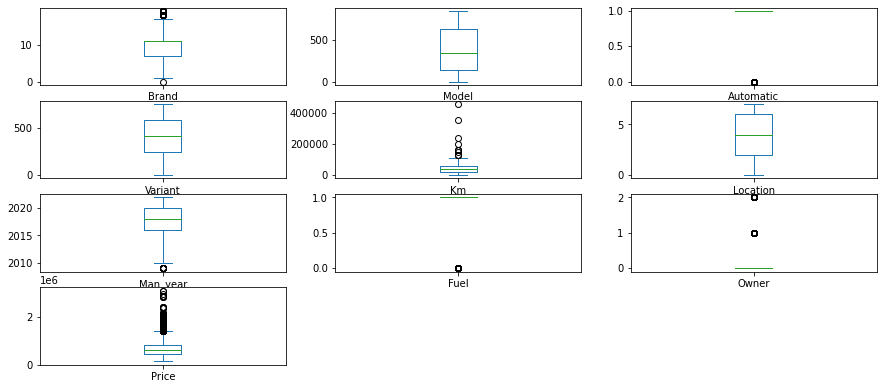

In [113]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,10))

In [119]:
outliers_col=['Km','Price']
for col in outliers_col:
    from scipy.stats import zscore
    z=np.abs(zscore(df[col]))

In [120]:
Threshold=3
print(np.where(z>3))

(array([  17,   38,   76,  141,  188,  205,  225,  269,  445,  456,  538,
        552,  567,  600,  630,  887, 1216, 1232, 1297, 1370, 1461, 1525,
       1672, 1722, 1739, 1816, 1869, 1997, 2085, 2156, 2161, 2249, 2321,
       2367, 2405, 2453, 2498, 2622, 2863, 3009, 3010, 3027, 3084, 3090,
       3117, 3234, 3272, 3277, 3503, 3571, 3614, 3841, 3899, 3943, 3963,
       4095, 4131, 4304, 4329, 4334, 4336, 4373, 4532, 4712, 4970, 5037,
       5042, 5112, 5135, 5163, 5191, 5194, 5195, 5199], dtype=int64),)


In [121]:
df_new=df[(z<3)]
df_new

,Brand,Model,Automatic,Variant,Km,Location,Man_year,Fuel,Owner,Price
0,11,21,1,365,15999,1,2013,1,0,274599
1,11,559,1,581,28022,1,2011,1,0,377999
2,7,19,1,523,3382,1,2022,1,0,807099
3,7,840,1,387,55910,1,2014,1,0,442299
4,11,646,1,725,47003,1,2012,1,0,493799
...,...,...,...,...,...,...,...,...,...,...
5229,7,811,1,527,22364,5,2016,1,0,566599
5230,5,232,1,103,45877,5,2016,1,1,518999
5231,5,232,1,103,45877,5,2016,1,1,518999
5232,11,769,1,368,44517,5,2017,1,0,461999


In [122]:
df.shape

(5234, 10)

* There are 5234 rows and 10 columns in the old dataset

In [123]:
df_new.shape

(5160, 10)

* There are 5160 rows and 10 columns in new dataset after removing outliers.

In [124]:
# Now we can check for data loss

Dataloss = (((5234-5160)/5234)*100)
Dataloss

1.4138326327856323

We can observe that dataloss in zscore method after removing outliers of 1.4% which is less than 10%

In [125]:
df_new.skew()

Brand        0.538537
Model        0.162156
Automatic   -1.697110
Variant     -0.253692
Km           1.706168
Location    -0.091972
Man_year    -0.749073
Fuel        -1.921112
Owner        1.662649
Price        1.248219
dtype: float64

In [126]:
# we can observe that there is skewness present in the data in case of Km, Fuel, Owner and price

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [127]:
df_new[['Km','Fuel','Owner']]=scaler.fit_transform(df_new[['Km','Fuel','Owner']].values)

In [128]:
df_new.skew()

Brand        0.538537
Model        0.162156
Automatic   -1.697110
Variant     -0.253692
Km          -0.054194
Location    -0.091972
Man_year    -0.749073
Fuel        -1.921112
Owner        1.318904
Price        1.248219
dtype: float64

Hence the skewness is removed from the data

In [129]:
#We can now check for multicolinearity

x=df_new.drop(['Price'],axis=1)
x.sample()

,Brand,Model,Automatic,Variant,Km,Location,Man_year,Fuel,Owner
23,11,639,1,581,1.309691,1,2012,0.426133,1.854273


In [130]:
y=df_new['Price']
y

0       274599
1       377999
2       807099
3       442299
4       493799
         ...  
5229    566599
5230    518999
5231    518999
5232    461999
5233    499599
Name: Price, Length: 5160, dtype: int64

In [131]:
y.shape,x.shape

((5160,), (5160, 9))

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)

In [134]:
vif_calc()

   VIF Factor   Features
0   10.676823      Brand
1    3.255841      Model
2    5.693502  Automatic
3    5.257862    Variant
4    1.101183         Km
5    4.037878   Location
6   19.934223   Man_year
7    1.086628       Fuel
8    1.027014      Owner


As we can observe from the above table Brand and Man_year are creating multicollinearity in the data, from the correlation data we can observe that Brand is giving lesser contribution to Price than Man_year hence we can drop off Brand at this stage

In [135]:
x = x.drop(["Brand"],axis=1)
x.shape

(5160, 8)

In [136]:
vif_calc()

   VIF Factor   Features
0    3.239339      Model
1    5.685043  Automatic
2    4.738129    Variant
3    1.090313         Km
4    4.037286   Location
5   14.151983   Man_year
6    1.086550       Fuel
7    1.022820      Owner


Hence the multicollinearity is removed from the dataset 

In [137]:
# Splitting the data for training and testing the model

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [138]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3870, 8), (1290, 8), (3870,), (1290,))

In [139]:
from sklearn.linear_model import Ridge, Lasso
lm=LinearRegression()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
svr=SVR()
La=Lasso()
rd=Ridge()

In [140]:
model=[lm,DTR,KNR,svr,La,rd]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print("Score of ",m,"is :",m.score(x_train,y_train))
    print("r2 score :",r2_score(y_test,pred))
    print("Errors of ",m,"is")
    print("Mean absolute error :",mean_absolute_error(y_test,pred))
    print("Mean squared error :",mean_squared_error(y_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')

Score of  LinearRegression() is : 0.46223263548891136
r2 score : 0.4607288020512167
Errors of  LinearRegression() is
Mean absolute error : 181507.8520388029
Mean squared error : 58232789942.47578
Root mean squared error : 241314.71140913846


Score of  DecisionTreeRegressor() is : 1.0
r2 score : 0.8856989739270548
Errors of  DecisionTreeRegressor() is
Mean absolute error : 52191.3023255814
Mean squared error : 12342709321.085272
Root mean squared error : 111097.7466967052


Score of  KNeighborsRegressor() is : 0.9312647672138857
r2 score : 0.8829131670543853
Errors of  KNeighborsRegressor() is
Mean absolute error : 68119.48217054263
Mean squared error : 12643532556.321117
Root mean squared error : 112443.46382214094


Score of  SVR() is : -0.06249700928625779
r2 score : -0.06351237843884627
Errors of  SVR() is
Mean absolute error : 238263.43715591598
Mean squared error : 114842574887.03113
Root mean squared error : 338884.30900092016


Score of  Lasso() is : 0.4622326353908497
r2 score

From the above models we can consider that Decision tree regressor and KNeighbors regressor is giving us the best accuracy and r2 score

In [141]:
#WE can now try with Cross validation for the models 
from sklearn.model_selection import cross_val_score
model=[lm,DTR,KNR,svr,La,rd]
for i in model:
    score=cross_val_score(i,x_train,y_train,cv=5)
    print("score of ",i,"is :",score)
    print("score mean of ",i,"is :",score.mean())
    print("score std of ",i,"is :",score.std())
    print('\n')

score of  LinearRegression() is : [0.45492432 0.46735752 0.46652395 0.47224263 0.41413595]
score mean of  LinearRegression() is : 0.45503687356672984
score std of  LinearRegression() is : 0.021225870799711406


score of  DecisionTreeRegressor() is : [0.86652878 0.82924843 0.83115605 0.82659283 0.8401528 ]
score mean of  DecisionTreeRegressor() is : 0.8387357784388085
score std of  DecisionTreeRegressor() is : 0.014624446295323727


score of  KNeighborsRegressor() is : [0.86438745 0.86050228 0.85181933 0.84352229 0.87503493]
score mean of  KNeighborsRegressor() is : 0.8590532574230124
score std of  KNeighborsRegressor() is : 0.010765760104897088


score of  SVR() is : [-0.11538187 -0.04185955 -0.03420305 -0.10499908 -0.03255978]
score mean of  SVR() is : -0.06580066596765985
score std of  SVR() is : 0.03652767207186505


score of  Lasso() is : [0.45492395 0.46735659 0.46652453 0.47224262 0.41413698]
score mean of  Lasso() is : 0.4550369354196386
score std of  Lasso() is : 0.021225426131

With CV we can see that KNeighbors is giving best mean score of 85.9%

In [142]:
# Parameter tuning for Decision Tree regressor

from sklearn.model_selection import GridSearchCV
DTR=DecisionTreeRegressor()
params={'criterion':['squared_error','friedman_mse','absolute_error','poisson']}
grd=GridSearchCV(estimator=DTR,param_grid=params,cv=5)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']})

In [143]:
grd.best_params_

{'criterion': 'friedman_mse'}

In [144]:
grd.best_score_

0.830567728580397

Decision tree Regressor is giving the best score of 83% with friedman_mse as the criterion

In [145]:
# parameter tuning for KNeighbors Regressor

KNR=KNeighborsRegressor()
params={'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
grd=GridSearchCV(estimator=KNR,param_grid=params,cv=5)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

In [146]:
grd.best_params_

{'algorithm': 'brute', 'weights': 'distance'}

In [147]:
grd.best_score_

0.9112141564651894

KNeighbhors Regressor is giving the best score of 91.1% with brute as algorith and distance as weights, this is a better score compared to Decision tree regressor hence we can finalize this to be our best model

In [148]:
# Saving the best model
Final_regressor=KNeighborsRegressor(algorithm='brute',weights='distance')
Final_regressor.fit(x_train,y_train)
pred=Final_regressor.predict(x_test)
print("Score: ",Final_regressor.score(x_train,y_train)*100)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test,pred)))

Score:  99.99999994948516
R2_Score: 91.59486399543098
mean_squared_error: 9076222154.154293
mean_absolute_error: 57390.8022006161
RMSE value: 95269.2088460605


In [149]:
# We can save the model now
import joblib
joblib.dump(Final_regressor,'Car_Pricing.obj')

['Car_Pricing.obj']

Loading the saved model and predicting the values

In [150]:
Car_Price=joblib.load('Car_Pricing.obj')

In [151]:
pred=Car_Price.predict(x_test)
print("Predicted values :",pred)

Predicted values : [ 485223.43519919  716526.41654025  470223.61828445 ...  814816.84118779
 1287971.06568832  964119.51742473]


In [152]:
y_test

2422     491499
3575     793299
669      494599
1100     366099
2553    1056699
         ...   
4609     765699
3472     876099
1371     836949
3710    1139899
4741     936399
Name: Price, Length: 1290, dtype: int64

In [153]:
# Making a DataFrame of Predicted values and Original values
df1=pd.DataFrame({'Predicted values':pred.round(2),'Original values':y_test})
df1

,Predicted values,Original values
2422,485223.44,491499
3575,716526.42,793299
669,470223.62,494599
1100,366397.59,366099
2553,963137.63,1056699
...,...,...
4609,880780.42,765699
3472,812558.46,876099
1371,814816.84,836949
3710,1287971.07,1139899


We can observe that both predicted and original values to be almost near by with KNeighbors model with is giving 99.9% accuracy and r2 score as 91.5